# **IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy

# **Load Dataset**

**Pengamatan cuaca**

In [ ]:
def sortByDate(year_data):

    month_data = year_data.loc[year_data['month'] == 1]
    sorted_df = month_data.sort_values(by = 'day')

    for month in range(2,13):
        month_data = year_data.loc[year_data['month'] == month]
        sorted_month_data = month_data.sort_values(by = 'day')
        sorted_df = pd.concat([sorted_df, sorted_month_data],)

    return sorted_df

In [ ]:
def load_weather_data():

    years_to_load = ['2012','2013','2014','2015','2016','2017','2018']
    path=["weather_2012.csv","weather_2013.csv","weather_2014.csv","weather_2015.csv","weather_2016.csv","weather_2017.csv","weather_2018.csv"]
    col = list()
    datalist = list()
    week_col = list()
    load_years=list()

    first_year = True
    for filename in path:
        year_data = pd.read_csv(filename)
        year_data = sortByDate(year_data)
        if first_year:
            weather_data = year_data
            first_year = False
        else:
            weather_data = pd.concat([weather_data, year_data], sort = True)

    year,week,day = datetime.date(int(years_to_load[0]),1,1).isocalendar()
    count = 8-day
    rows, cols = weather_data.shape
    first_year=int(years_to_load[0])


    for i in range(count):
        week_col.append(week)
    if week==52:
        if datetime.date(year,12,28).isocalendar()[1] == 53:
            week = 53
        else:
            week = 1
            if year == first_year:
                first_year +=1
    elif week == 53:
        week = 1
        if year == first_year:
            first_year += 1
        week=1
    else:
        week+=1


    while len(week_col)<rows:
        for i in range(7):
            if len(week_col)<rows:
                week_col.append(week)
        if week==52:
            if datetime.date(int(first_year),12,28).isocalendar()[1] == 53:
                week = 53
            else:
                week = 1
                first_year += 1

        elif week == 53:
            week = 1
            first_year += 1

        else:
            week += 1


    weather_data.drop("Unnamed: 0",axis=1,inplace=True)

    weather_data.insert(loc=0, column='week', value = week_col)
    weather_data.set_index(["year","month","week","day"],inplace=True)
    return weather_data

In [ ]:
data_weather=load_weather_data()

In [ ]:
data_weather

hum_14h  hum_19h  hum_7h  hum_dailyMean  precip  \
year month week day                                                    
2012 1     52   1       97.0     99.0    99.0             98     2.2   
           1    2       92.0     93.0   100.0             95     2.9   
                3       56.0     91.0    88.0             78     2.9   
                4       69.0     75.0    83.0             76     0.0   
                5       71.0     84.0    46.0             67     1.2   
...                      ...      ...     ...            ...     ...   
2018 8     35   27      34.0     48.0    69.0             50     0.0   
                28      39.0     56.0    70.0             55     0.0   
                29      36.0     49.0    69.0             51     0.0   
                30       NaN      NaN     NaN             68     2.8   
                31      49.0     64.0    76.0             63    11.8   

                     skyCover_14h  skyCover_19h  skyCover_7h  sun_hours  \
year month week day                                                       
2012 1     52   1            10.0          10.0         10.0        0.0   
           1    2            10.0           9.0         10.0        0.0   
                3             4.0           0.0          9.0        3.8   
                4            10.0           2.0         10.0        0.0   
                5            10.0          10.0         10.0        0.0   
...                           ...           ...          ...        ...   
2018 8     35   27            3.0           1.0          8.0       12.9   
                28            4.0           3.0          8.0        8.8   
                29            1.0           9.0          1.0       12.0   
                30            6.0          10.0          7.0        6.3   
                31            9.0           8.0          1.0        6.2   

                     temp_14h  temp_19h  temp_7h  temp_dailyMax  \
year month week day                                               
2012 1     52   1         3.1      40.0      2.2            3.6   
           1    2         2.6       3.3      0.5            3.7   
                3         8.8       4.7      6.6            9.8   
                4         8.0       5.3      4.8           10.7   
                5         8.0       6.3      5.5            9.1   
...                       ...       ...      ...            ...   
2018 8     35   27       22.5      18.4     14.0           24.3   
                28       25.6      86.8     17.5           27.3   
                29       28.9      24.5      NaN           29.2   
                30       27.1      16.6     21.2           27.3   
                31       22.7      19.9     17.2           23.7   

                     temp_dailyMean  temp_dailyMin  temp_minGround  \
year month week day                                                  
2012 1     52   1               2.2            0.8            -1.2   
           1    2               2.1            0.4             0.4   
                3               6.6            3.3             2.7   
                4               7.2            3.6             1.0   
                5               6.7            4.3             2.3   
...                             ...            ...             ...   
2018 8     35   27             17.4           10.4             7.5   
                28             20.9           14.5            11.6   
                29             21.6           13.9            11.0   
                30             22.0           16.6            14.8   
                31             19.1           14.5            12.0   

                     wind_degrees  wind_mSec  
year month week day                           
2012 1     52   1           225.0        4.6  
           1    2           281.0       15.2  
                3           297.0       14.3  
                4           294.0       17.4  
                5           272.0       21.

**Load data Infeksi influenza**

In [ ]:
def load_influenza_data():

    influenza_data=pd.read_csv('influenza.csv')
    influenza_data = pd.DataFrame(influenza_data)
    influenza_data= influenza_data[["Neuerkrankungen pro Woche","Jahr","Kalenderwoche"]]
    new_names = {'Neuerkrankungen pro Woche':'weekly_infections',"Jahr":"year","Kalenderwoche":"week"}

    influenza_data.rename(index=str, columns=new_names,inplace=True)
    influenza_data['week'] = influenza_data['week'].str.replace('Woche', '')
    influenza_data['week'] = influenza_data['week'].str.replace('.', '')
    influenza_data['year'] = influenza_data['year'].astype(int)
    influenza_data['week'] = influenza_data['week'].astype(int)
    influenza_data.set_index(["year","week"],inplace=True)
    return influenza_data

In [ ]:
data_influenza = load_influenza_data()

In [ ]:
data_influenza

weekly_infections
year week                  
2009 40                6600
     41                7100
     42                7700
     43                8300
     44                8600
...                     ...
2018 10               13500
     11                9600
     12                7800
     13                4500
     14                3300

[233 rows x 1 columns]

Periksa nilai yang hilang:

In [ ]:
data_weather.isnull().any().any()

True

# **Menangani Nilai yang Hilang**

In [ ]:
def handle_missingValues_simple(incomplete_data):

    wind=incomplete_data[["wind_mSec"]].interpolate(method='linear')
    temp7h = incomplete_data['temp_7h'].fillna(method='bfill')
    temp14h = incomplete_data['temp_14h'].fillna(method='bfill')
    temp19h = incomplete_data['temp_19h'].fillna(method='bfill')
    hum_missing = incomplete_data[["hum_14h","hum_19h","hum_7h"]]
    hum_missing = hum_missing.reset_index()
    hum_missing = hum_missing.interpolate(method = 'piecewise_polynomial')
    hum_missing.set_index(["year","month","week","day"],inplace = True)

    #2012 hingga 2018_01 oke (hanya sedikit NaN)
    wind_degrees_only = incomplete_data[["wind_degrees"]]
    wind_degrees_2012_until_2018_01 = wind_degrees_only.iloc[0:2223]
    wind_degrees_2012_until_2018_01 = wind_degrees_2012_until_2018_01.interpolate(method='linear')

    #Bagian yang rumit (temukan indeks sebelumnya)
    wind_degrees_2018_Feb = wind_degrees_only.iloc[2223:2251]
    wind_degrees_2018_Feb.iloc[:] = wind_degrees_only.iloc[1858:1886].values

    wind_degrees_2018_March = wind_degrees_only.iloc[2251:2282] #no NaN

    wind_degrees_2018_April = wind_degrees_only.iloc[2282:2312]
    wind_degrees_2018_April.iloc[:] = wind_degrees_only.iloc[1917:1947].values

    wind_degrees_2018_May = wind_degrees_only.iloc[2312:2343]
    wind_degrees_2018_May.iloc[:] = wind_degrees_only.iloc[1947:1978].values

    wind_degrees_2018_June_July_August = wind_degrees_only.iloc[2343:] #no NaN

    skyCover_and_sun = incomplete_data[['skyCover_14h','skyCover_19h','skyCover_7h','sun_hours']].interpolate(method='linear')

    wind_degrees = pd.concat([wind_degrees_2012_until_2018_01, wind_degrees_2018_Feb, wind_degrees_2018_March,
                              wind_degrees_2018_April,wind_degrees_2018_May, wind_degrees_2018_June_July_August])

    complete_data = pd.concat([ incomplete_data[['temp_dailyMax','temp_dailyMean',
                                                'temp_dailyMin','temp_minGround','hum_dailyMean','precip']],hum_missing,wind,temp7h,temp14h,temp19h,skyCover_and_sun], axis = 1, sort = True)

    return complete_data

In [ ]:
data_weather_complete = handle_missingValues_simple(data_weather)

In [ ]:
data_weather_complete

temp_dailyMax  temp_dailyMean  temp_dailyMin  \
year month week day                                                 
2012 1     1    2              3.7             2.1            0.4   
                3              9.8             6.6            3.3   
                4             10.7             7.2            3.6   
                5              9.1             6.7            4.3   
                6              6.8             5.2            3.5   
...                            ...             ...            ...   
2018 8     35   27            24.3            17.4           10.4   
                28            27.3            20.9           14.5   
                29            29.2            21.6           13.9   
                30            27.3            22.0           16.6   
                31            23.7            19.1           14.5   

                     temp_minGround  hum_dailyMean  precip  hum_14h  hum_19h  \
year month week day                                                            
2012 1     1    2               0.4             95     2.9     92.0     93.0   
                3               2.7             78     2.9     56.0     91.0   
                4               1.0             76     0.0     69.0     75.0   
                5               2.3             67     1.2     71.0     84.0   
                6               3.0             60     0.1     56.0     55.0   
...                             ...            ...     ...      ...      ...   
2018 8     35   27              7.5             50     0.0     34.0     48.0   
                28             11.6             55     0.0     39.0     56.0   
                29             11.0             51     0.0     36.0     49.0   
                30             14.8             68     2.8     42.5     56.5   
                31             12.0             63    11.8     49.0     64.0   

                     hum_7h  wind_mSec  temp_7h  temp_14h  temp_19h  \
year month week day                                                   
2012 1     1    2     100.0       15.2      0.5       2.6       3.3   
                3      88.0       14.3      6.6       8.8       4.7   
                4      83.0       17.4      4.8       8.0       5.3   
                5      46.0       21.8      5.5       8.0       6.3   
                6      70.0       22.4      4.3       6.2       3.9   
...                     ...        ...      ...       ...       ...   
2018 8     35   27     69.0        7.7     14.0      22.5      18.4   
                28     70.0        7.4     17.5      25.6      86.8   
                29     69.0       11.2     21.2      28.9      24.5   
                30     72.5       16.7     21.2      27.1      16.6   
                31     76.0        7.8     17.2      22.7      19.9   

                     skyCover_14h  skyCover_19h  skyCover_7h  sun_hours  
year month week day                                                      
2012 1     1    2            10.0           9.0         10.0        0.0  
                3             4.0           0.0          9.0        3.8  
                4            10.0           2.0         10.0        0.0  
                5            10.0          10.0         10.0        0.0  
                6             6.0           3.0          7.0        2.9  
...                           ...           ...          ...        ...  
2018 8     35   27            3.0           1.0          8.0       12.9  
                28            4.0           3.0          8.0        8.8  
                29            1.0           9.0          1.0       12.0  
                30            6.0          10.0          7.0        6.3  
                31            9.0           8.0          1.0        6.2  

[2435 rows x 17 columns]

Periksa nilai yang hilang:

In [ ]:
data_weather_complete.isnull().any().any()

False

# **Menangani Outliers**

(array([  1.,   4.,   4.,   5.,  10.,   9.,  12.,  26.,  35.,  57.,  92.,
        136., 142., 154., 174., 145., 151., 138., 174., 129., 140., 167.,
        148., 124., 100.,  80.,  51.,  15.,   9.,   3.]),
 array([-1.780e+01, -1.643e+01, -1.506e+01, -1.369e+01, -1.232e+01,
        -1.095e+01, -9.580e+00, -8.210e+00, -6.840e+00, -5.470e+00,
        -4.100e+00, -2.730e+00, -1.360e+00,  1.000e-02,  1.380e+00,
         2.750e+00,  4.120e+00,  5.490e+00,  6.860e+00,  8.230e+00,
         9.600e+00,  1.097e+01,  1.234e+01,  1.371e+01,  1.508e+01,
         1.645e+01,  1.782e+01,  1.919e+01,  2.056e+01,  2.193e+01,
         2.330e+01]),
 <BarContainer object of 30 artists>)

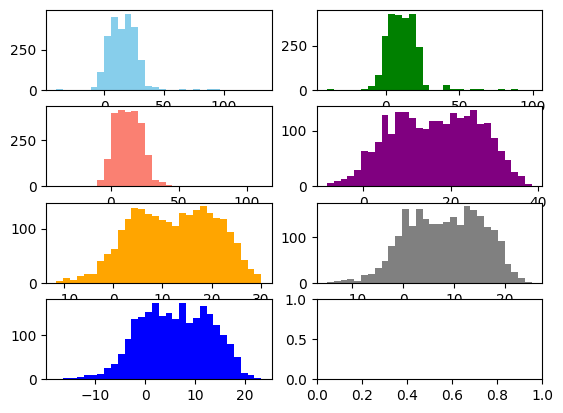

In [ ]:
fig, ax = plt.subplots(4, 2)

# Menampilkan histogram untuk setiap variabel cuaca
ax[0, 0].hist(data_weather_complete['temp_14h'], bins=30, color='skyblue')
ax[1, 0].hist(data_weather_complete['temp_19h'], bins=30, color='salmon')
ax[0, 1].hist(data_weather_complete['temp_7h'], bins=30, color='green')
ax[1, 1].hist(data_weather_complete['temp_dailyMax'], bins=30, color='purple')
ax[2, 0].hist(data_weather_complete['temp_dailyMean'], bins=30, color='orange')
ax[2, 1].hist(data_weather_complete['temp_dailyMin'], bins=30, color='gray')
ax[3, 0].hist(data_weather_complete['temp_minGround'], bins=30, color='blue')

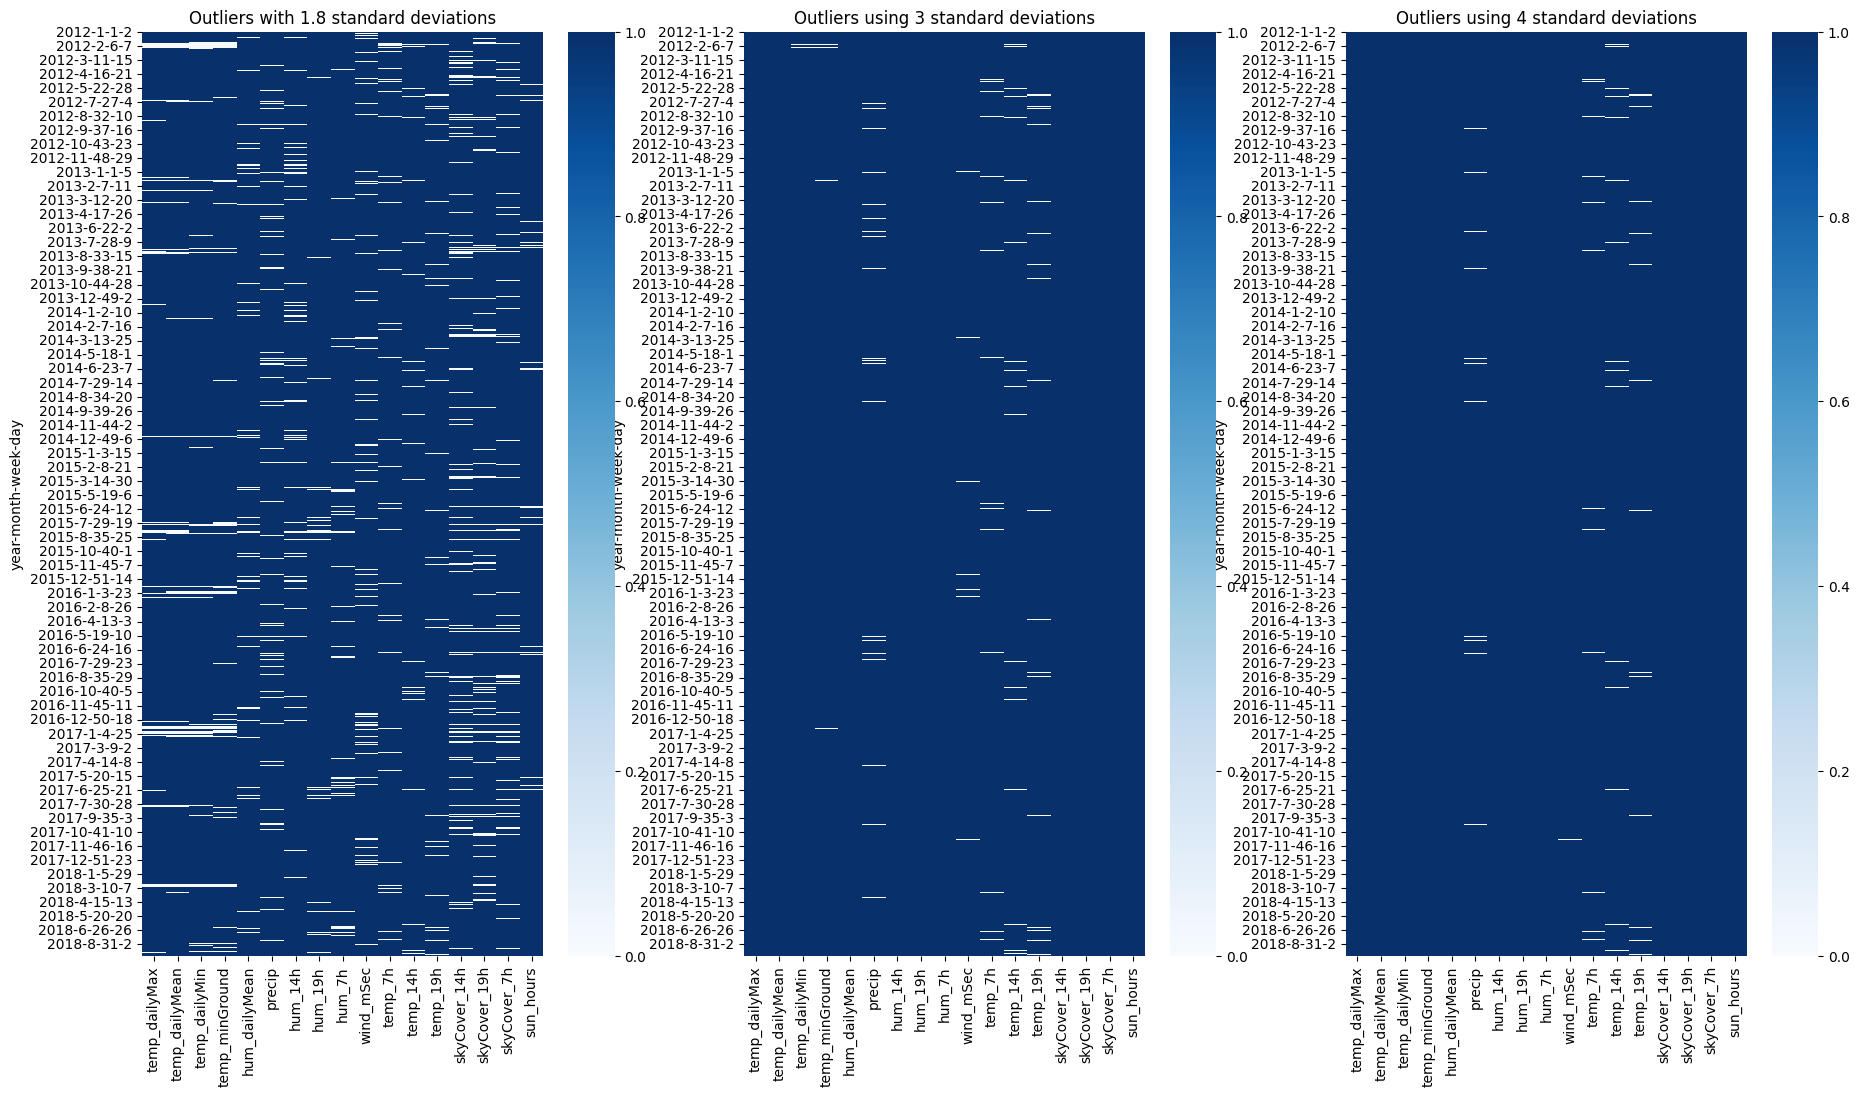

In [ ]:
def out_std(s, nstd=3.0, return_thresholds=False):

    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [False if x < lower or x > upper else True for x in s]


std2 = data_weather_complete.apply(out_std, nstd=1.8)
std3 = data_weather_complete.apply(out_std, nstd=3.0)
std4 = data_weather_complete.apply(out_std, nstd=4.0)


f, ((ax1, ax2, ax3)) = plt.subplots(ncols=3, nrows=1, figsize=(22, 12));
ax1.set_title('Outliers with 1.8 standard deviations');
ax2.set_title('Outliers using 3 standard deviations');
ax3.set_title('Outliers using 4 standard deviations');

sns.heatmap(std2, cmap='Blues', ax=ax1);
sns.heatmap(std3, cmap='Blues', ax=ax2);
sns.heatmap(std4, cmap='Blues', ax=ax3);

plt.show()

In [ ]:
def handle_outliers(noisy_data):

    noisy_data=noisy_data[std2]
    noisy_data.loc[noisy_data.temp_14h >= 40, 'temp_14h'] = np.NaN

    noisy_data = noisy_data.reset_index()
    noisy_data = noisy_data.interpolate(method = 'piecewise_polynomial')
    noisy_data.set_index(["year","month","week","day"],inplace = True)

    cleaned_data = noisy_data
    return cleaned_data

In [ ]:
data_weather_cleaned = handle_outliers(data_weather_complete)

<Axes: xlabel='year,month,week,day'>

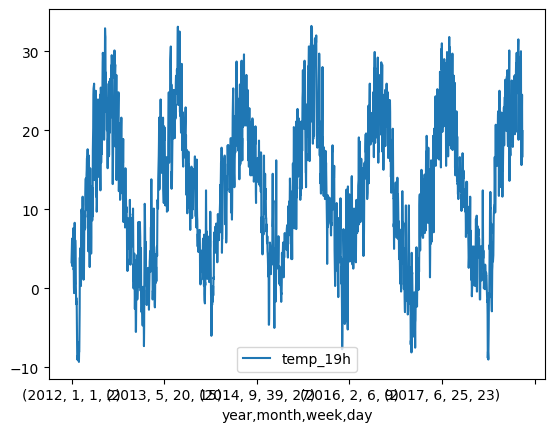

In [ ]:
data_weather_cleaned[["temp_19h"]].plot()

# **Nilai agregat**

In [ ]:
def aggregate_weekly(data):

    data=data.reset_index()
    data = data.iloc[1:] #Agregasi dengan 2012 1 1 sebenarnya adalah minggu ke 52 dari tahun 2011 (karena cara penghitungannya) jadi sebaiknya kita tidak memasukkannya ke dalam agregasi
    data.set_index(["year","week"],inplace=True)

    data["temp_weeklyMin"] = data.pivot_table('temp_dailyMin', index=["year", 'week'], aggfunc=min)
    data["temp_weeklyMax"] = data.pivot_table('temp_dailyMax', index=["year", 'week'], aggfunc=np.mean)
    data["temp_weeklyMean"] = data.pivot_table('temp_dailyMean', index=["year", 'week'], aggfunc=np.mean)
    data["temp_7h_weeklyMedian"] = data.pivot_table('temp_7h', index=["year", 'week'], aggfunc=np.median)
    data["temp_14h_weeklyMedian"] = data.pivot_table('temp_14h', index=["year", 'week'], aggfunc=np.median)
    data["temp_19h_weeklyMedian"] = data.pivot_table('temp_19h', index=["year", 'week'], aggfunc=np.median)
    data["hum_weeklyMean"] = data.pivot_table('hum_dailyMean', index=["year", 'week'], aggfunc=np.mean)
    data["hum_7h_weeklyMedian"] = data.pivot_table('hum_7h', index=["year", 'week'], aggfunc=np.median)
    data["hum_14h_weeklyMedian"] = data.pivot_table('hum_14h', index=["year", 'week'], aggfunc=np.median)
    data["hum_19h_weeklyMedian"] = data.pivot_table('hum_19h', index=["year", 'week'], aggfunc=np.median)
    data["precip_weeklyMean"] = data.pivot_table('precip', index=["year", 'week'], aggfunc=np.mean)
    data["wind_mSec_mean"] = data.pivot_table('wind_mSec', index=["year", 'week'], aggfunc=np.mean)
    weekly_weather_data = data.drop(["temp_minGround", "sun_hours", "skyCover_7h", "skyCover_19h", "skyCover_14h",
                                     'temp_dailyMin', 'temp_dailyMax', 'temp_dailyMean', 'temp_7h', 'temp_14h',
                                     'temp_19h', 'hum_dailyMean', 'hum_7h', 'hum_14h', 'hum_19h', 'precip',
                                     'wind_mSec'], axis=1)
    ww2012 = weekly_weather_data.xs(2012, level='year')
    ww2012 = ww2012[~ww2012.index.get_level_values(0).duplicated()]
    ww2013 = weekly_weather_data.xs(2013, level='year')
    ww2013 = ww2013[~ww2013.index.get_level_values(0).duplicated()]
    ww2014 = weekly_weather_data.xs(2014, level='year')
    ww2014 = ww2014[~ww2014.index.get_level_values(0).duplicated()]
    ww2015 = weekly_weather_data.xs(2015, level='year')
    ww2015 = ww2015[~ww2015.index.get_level_values(0).duplicated()]
    ww2016 = weekly_weather_data.xs(2016, level='year')
    ww2016 = ww2016[~ww2016.index.get_level_values(0).duplicated()]
    ww2017 = weekly_weather_data.xs(2017, level='year')
    ww2017 = ww2017[~ww2017.index.get_level_values(0).duplicated()]
    ww2018 = weekly_weather_data.xs(2018, level='year')
    ww2018 = ww2018[~ww2018.index.get_level_values(0).duplicated()]

    weekly_weather_data = pd.concat([ww2012, ww2013, ww2014, ww2015, ww2016, ww2017, ww2018],
                                keys=['2012', '2013', "2014", "2015", "2016", "2017", "2018"])
    weekly_weather_data.index.names = ['year', 'week']
    weekly_weather_data.reset_index(inplace=True)
    weekly_weather_data['year'] = pd.to_numeric(weekly_weather_data['year'])
    weekly_weather_data['week'] = pd.to_numeric(weekly_weather_data['week'])
    weekly_weather_data.set_index(["year", "week"], inplace=True)

    return weekly_weather_data

In [ ]:
data_weather_weekly = aggregate_weekly(data_weather_cleaned)

In [ ]:
data_weather_weekly

month  day  temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
year week                                                                
2012 1         1    3       -2.000000        7.685714         5.157143   
     2         1    9        0.000000        6.771429         4.714286   
     3         1   16       -1.800000        5.642857         2.814286   
     4         1   23       -3.600000        3.142857         0.942857   
     5         1   30       -2.133333        2.528571         0.430612   
...          ...  ...             ...             ...              ...   
2018 31        7   30       20.300000       33.000000        26.992857   
     32        8    6       15.900000       30.785714        24.957143   
     33        8   13       15.200000       30.971429        24.242857   
     34        8   20       12.600000       28.378571        23.600000   
     35        8   27       10.400000       26.360000        20.200000   

           temp_7h_weeklyMedian  temp_14h_weeklyMedian  temp_19h_weeklyMedian  \
year week                                                                       
2012 1                     4.60                    6.2               3.900000   
     2                     4.80                    6.4               4.300000   
     3                     1.50                    4.4               2.300000   
     4                    -1.50                    2.2              -0.300000   
     5                    -2.05                   -6.9              -8.666667   
...                         ...                    ...                    ...   
2018 31                   24.60                   32.1              28.200000   
     32                   22.50                   29.0              26.700000   
     33                   20.10                   30.5              25.800000   
     34                   21.55                   30.4              27.500000   
     35                   17.50                   25.6              19.900000   

           hum_weeklyMean  hum_7h_weeklyMedian  hum_14h_weeklyMedian  \
year week                                                              
2012 1          76.571429            81.000000                  69.0   
     2          69.285714            71.000000                  59.0   
     3          71.214286            85.000000                  59.0   
     4          75.428571            78.000000                  64.0   
     5          60.000000            80.000000                  46.0   
...                   ...                  ...                   ...   
2018 31         53.285714            66.333333                  33.0   
     32         53.428571            61.000000                  44.0   
     33         50.857143            69.000000                  34.0   
     34         56.357143            63.000000                  32.0   
     35         57.400000            70.000000                  39.0   

           hum_19h_weeklyMedian  precip_weeklyMean  wind_mSec_mean  
year week                                                           
2012 1                     88.0           2.800000       14.685714  
     2                     63.0           2.142857       16.678571  
     3                     81.0           5.600000       15.300000  
     4                     82.0           2.800000       11.000000  
     5                     54.0           0.000000       10.900000  
...                         ...                ...             ...  
2018 31                    46.0           1.242857        9.421429  
     32                    66.0           0.585714       11.228571  
     33                    44.0           0.042857       10.228571  
     34                    65.0           4.600000       10.357143  
     35                    56.0           2.920000       10.160000  

[349 rows x 14 columns]

# **Menggabungkan kumpulan data influenza dan cuaca**

Gabungkan kumpulan data data_weather_weekly dan data_influenza.

In [ ]:
def merge_data(weather_df, influenza_df):

    merged_data = weather_df.join(influenza_df)
    merged_data = merged_data.reset_index()
    merged_data = merged_data.apply(pd.to_numeric)
    merged_data["weekly_infections"] = merged_data["weekly_infections"].interpolate(method='linear')
    merged_data.iloc[327:, 14] = merged_data.iloc[275:297, 14].values
    merged_data.set_index(["year", "week"], inplace=True)
    return merged_data

In [ ]:
data_merged = merge_data(data_weather_weekly, data_influenza)

In [ ]:
data_merged

month  day  temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
year week                                                                
2012 1         1    3       -2.000000        7.685714         5.157143   
     2         1    9        0.000000        6.771429         4.714286   
     3         1   16       -1.800000        5.642857         2.814286   
     4         1   23       -3.600000        3.142857         0.942857   
     5         1   30       -2.133333        2.528571         0.430612   
...          ...  ...             ...             ...              ...   
2018 31        7   30       20.300000       33.000000        26.992857   
     32        8    6       15.900000       30.785714        24.957143   
     33        8   13       15.200000       30.971429        24.242857   
     34        8   20       12.600000       28.378571        23.600000   
     35        8   27       10.400000       26.360000        20.200000   

           temp_7h_weeklyMedian  temp_14h_weeklyMedian  temp_19h_weeklyMedian  \
year week                                                                       
2012 1                     4.60                    6.2               3.900000   
     2                     4.80                    6.4               4.300000   
     3                     1.50                    4.4               2.300000   
     4                    -1.50                    2.2              -0.300000   
     5                    -2.05                   -6.9              -8.666667   
...                         ...                    ...                    ...   
2018 31                   24.60                   32.1              28.200000   
     32                   22.50                   29.0              26.700000   
     33                   20.10                   30.5              25.800000   
     34                   21.55                   30.4              27.500000   
     35                   17.50                   25.6              19.900000   

           hum_weeklyMean  hum_7h_weeklyMedian  hum_14h_weeklyMedian  \
year week                                                              
2012 1          76.571429            81.000000                  69.0   
     2          69.285714            71.000000                  59.0   
     3          71.214286            85.000000                  59.0   
     4          75.428571            78.000000                  64.0   
     5          60.000000            80.000000                  46.0   
...                   ...                  ...                   ...   
2018 31         53.285714            66.333333                  33.0   
     32         53.428571            61.000000                  44.0   
     33         50.857143            69.000000                  34.0   
     34         56.357143            63.000000                  32.0   
     35         57.400000            70.000000                  39.0   

           hum_19h_weeklyMedian  precip_weeklyMean  wind_mSec_mean  \
year week                                                            
2012 1                     88.0           2.800000       14.685714   
     2                     63.0           2.142857       16.678571   
     3                     81.0           5.600000       15.300000   
     4                     82.0           2.800000       11.000000   
     5                     54.0           0.000000       10.900000   
...                         ...                ...             ...   
2018 31                    46.0           4.000000        9.421429   
     32                    66.0           1.485714       11.228571   
     33                    44.0           0.242857       10.228571   
     34                    65.0           1.700000       10.357143   
     35                    56.0           0.185714       10.160000   

           weekly_infections  
year week                     
2012 1                7300.0  
     2                7500.0  
     3                

# **Visualisasi Data**

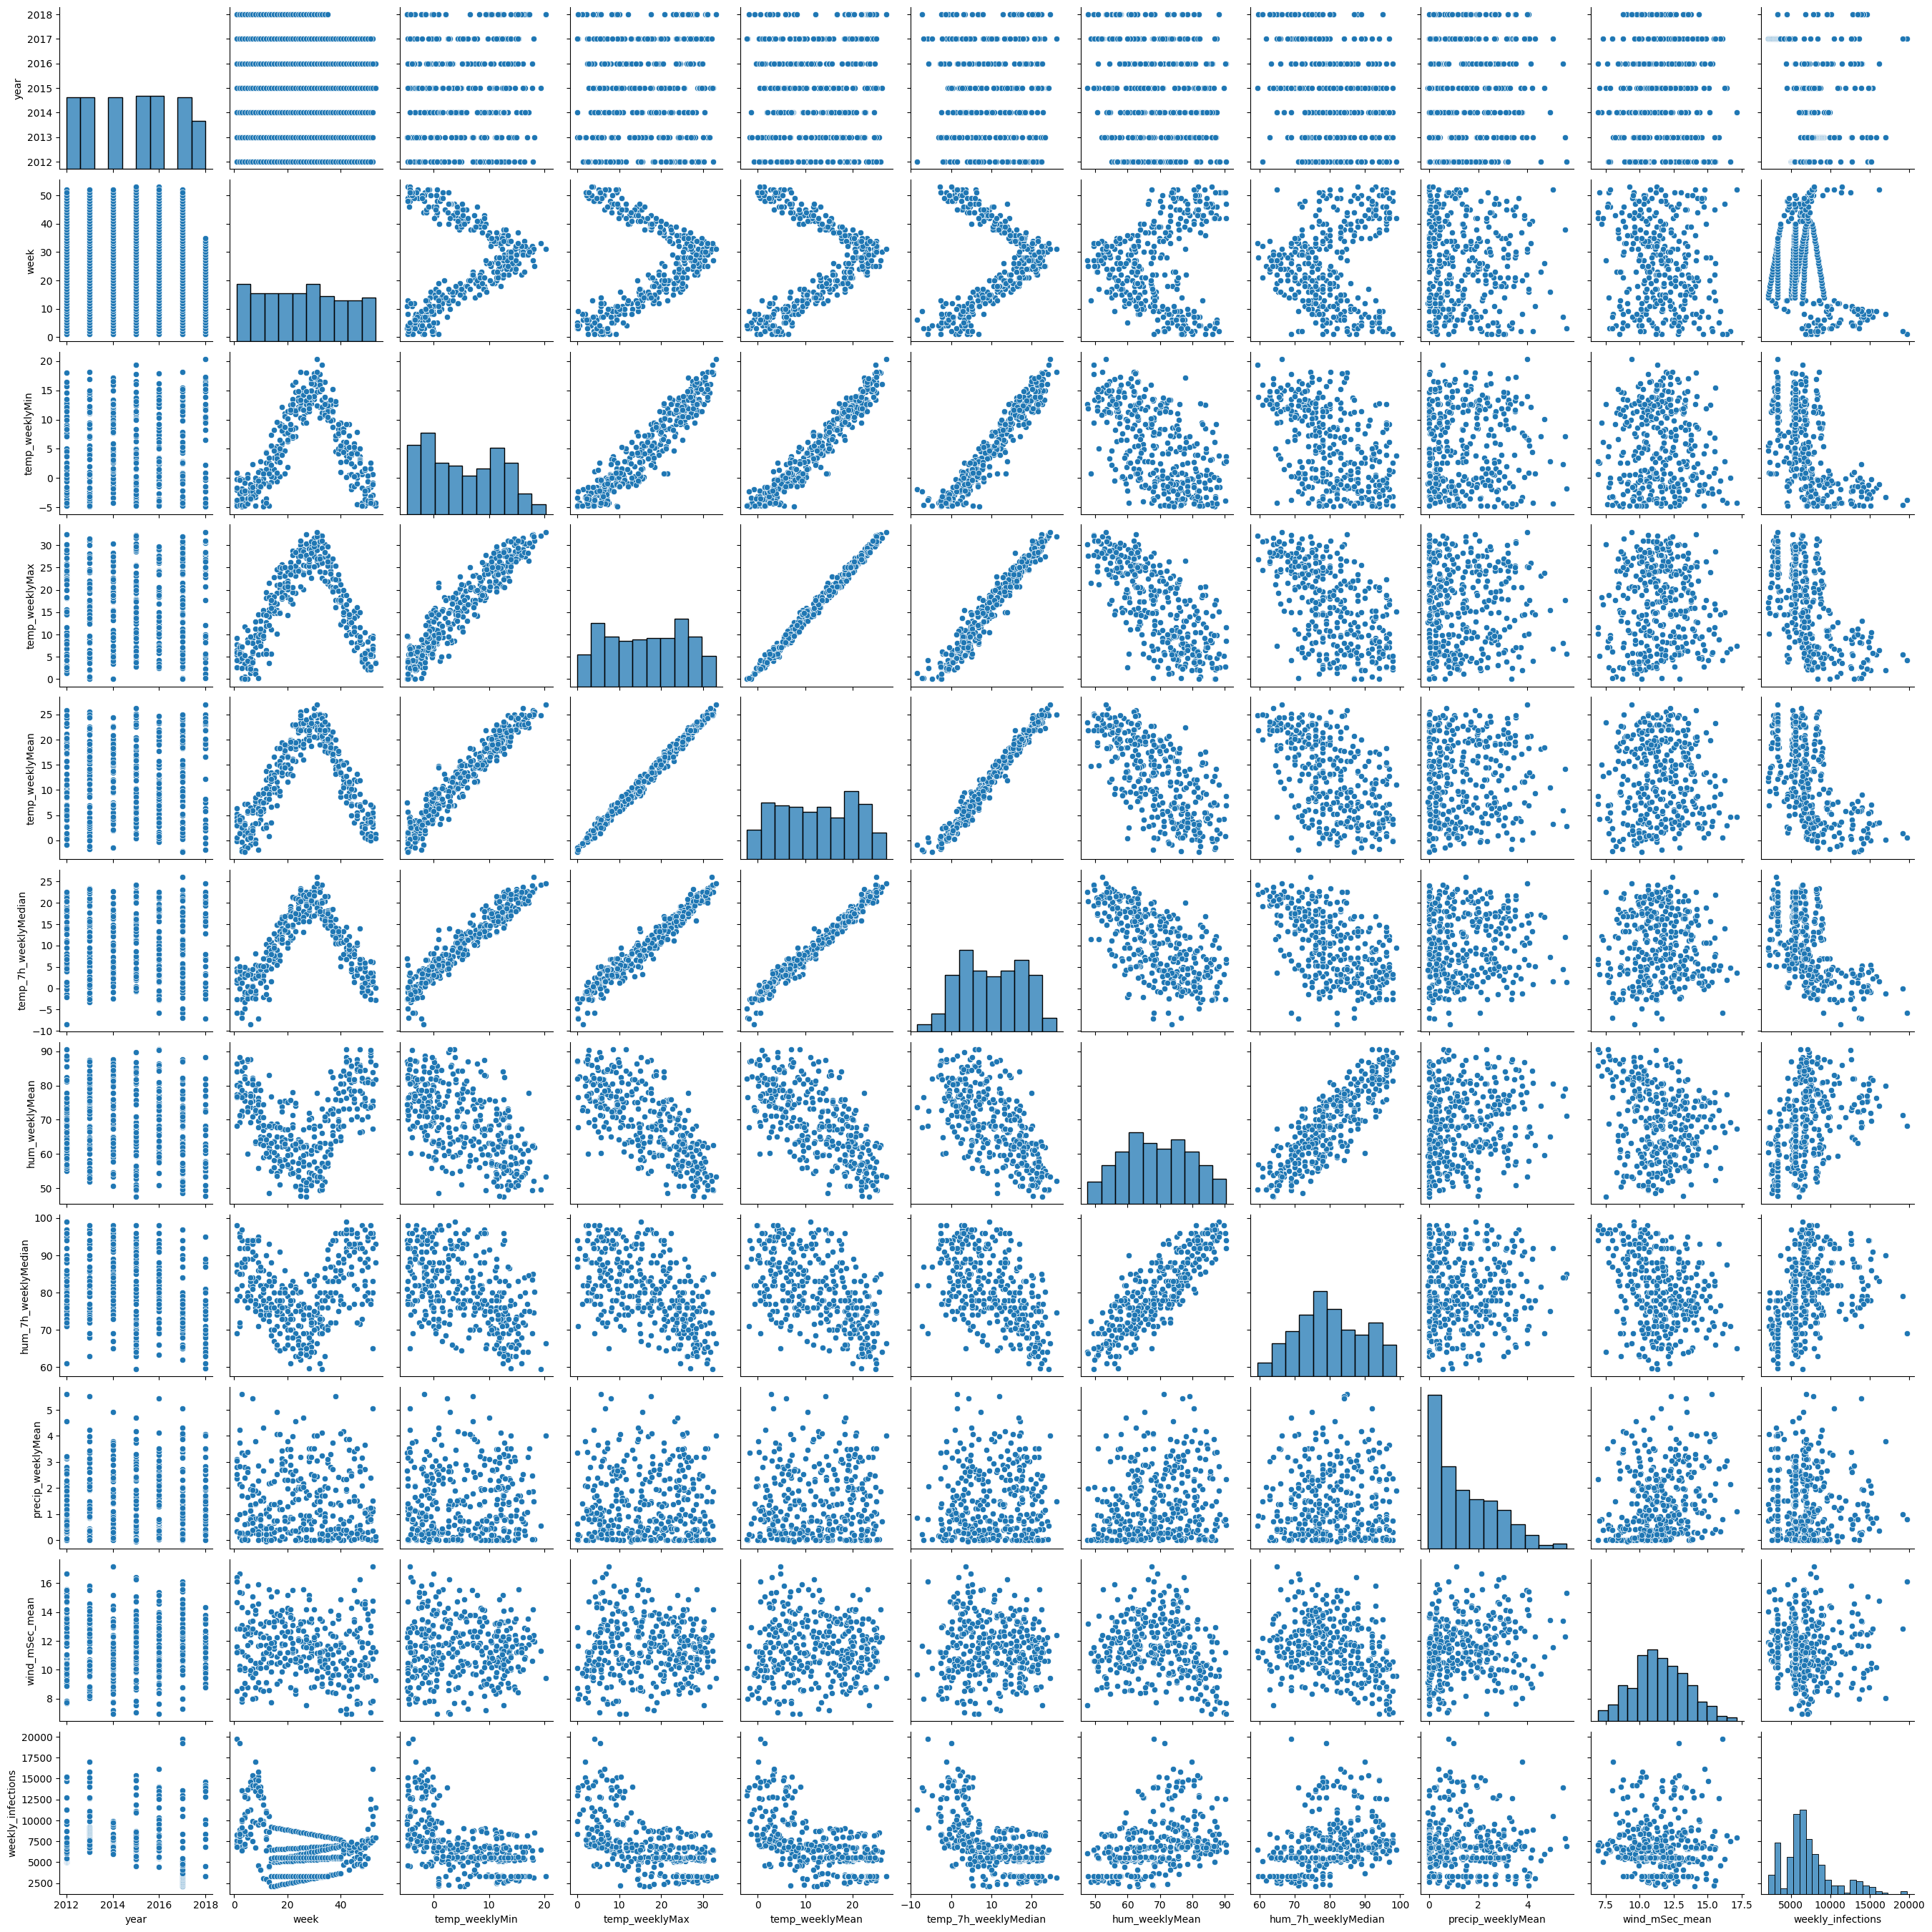

In [ ]:
data_merged2=data_merged[["temp_weeklyMin","temp_weeklyMax","temp_weeklyMean","temp_7h_weeklyMedian","hum_weeklyMean","hum_7h_weeklyMedian","precip_weeklyMean","wind_mSec_mean","weekly_infections"]].reset_index()

sns_plot2=sns.pairplot(data_merged2)
sns_plot2.savefig("01527395_01.png")

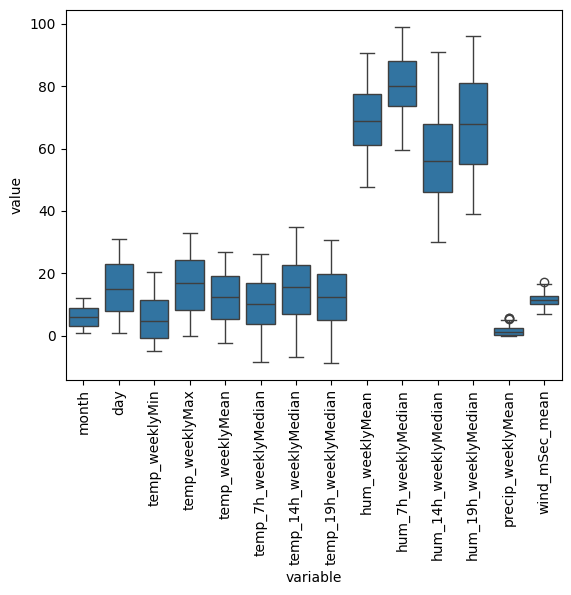

In [ ]:
# Buat bingkai data baru 'b' dengan menghapus kolom "infeksi_mingguan".
b = data_merged.drop(["weekly_infections"], axis=1).reset_index()
b=pd.DataFrame(b)

# Lelehkan bingkai data menggunakan kolom "tahun" dan "minggu" sebagai pengidentifikasi
melted = pd.melt(b, id_vars=['year', 'week'])

melted.drop(['year', 'week'],axis=1,inplace=True)
# Ubah kolom "nilai" menjadi tipe data numerik
melted["value"] = pd.to_numeric(melted["value"])
melted

# Buat plot kotak menggunakan Seaborn
sns_plot1 = sns.boxplot(x="variable", y="value", data=melted)
sns_plot1.set_xticklabels(sns_plot1.get_xticklabels(), rotation=90, fontsize=10)

# Simpan plot sebagai "01527395_02.png"
sns_plot1.figure.savefig("01527395_02.png")

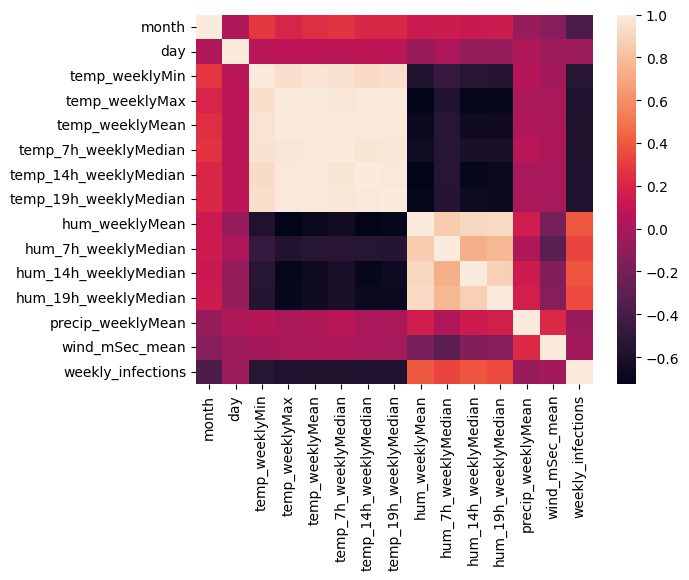

In [ ]:
data_merged1=data_merged.reset_index()
data_merged1.drop(['year',"week"],axis=1,inplace=True)

# calculate the correlation matrix
corr = data_merged1.corr()

# plot the heatmap
sns_plot2=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
sns_plot2.figure.savefig("01527395_03.png")

# **Model prediksi influenza**

Membangun model untuk memprediksi jumlah kejadian influenza pada tahun 2018 (membuang semua data yang tersedia untuk tahun 2018) berdasarkan data tahun sebelumnya yang menggunakan

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
import sklearn

data_merged1=data_merged.reset_index()
year=data_merged1["year"]
week=data_merged1["week"]
data_merged1=data_merged1.drop(["year","week"],axis=1)
dm1_col = data_merged1.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_merged1)
data_merged2=pd.DataFrame(np_scaled,columns =dm1_col)

X=data_merged2.drop(["weekly_infections"], axis=1)
X["year"]=year
X["week"]=week
X_2018=X.loc[X['year'] == 2018]
X=X.loc[X['year'] != 2018]

y=data_merged2["weekly_infections"].reset_index()


y["year"]=year
y["week"]=week
y_2018=y.loc[y['year'] == 2018]
y_2018.drop(["year","week","index"], axis=1,inplace=True)
y=y.loc[y['year'] != 2018]
y.drop(["year","week","index"], axis=1,inplace=True)
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import numpy as np

# Set seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=123)

# Define the model
def baseline_model():
    model = Sequential()
    model.add(Dense(200, input_dim=16, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
    return model

# Build and compile the model # Use Keras API directly
estimator = baseline_model()

# Fit the model
estimator.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0) # Use Keras fit method

# Make predictions
prediction =estimator.predict(X_train)
rmse_nn = sqrt(mean_squared_error(y_train, prediction))

prediction1 = estimator.predict(X_test)
rmse_nn1 = sqrt(mean_squared_error(y_test, prediction1))

# Preprocess X_2018 for prediction

prediction2 = estimator.predict(X_2018)
rmse_nn2 = sqrt(mean_squared_error(y_2018, prediction2))

print(rmse_nn, rmse_nn1, rmse_nn2)

2/2 [==============================] - 0s 5ms/step
0.16026189698310309 0.1612451346447762 0.23934541300568452


In [ ]:
from sklearn import *

model2 = ensemble.RandomForestRegressor(n_estimators=25, random_state=11, max_depth=1,
                                        min_weight_fraction_leaf=0.122)
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5


model2.fit(X_train, np.log1p(y_train.values))
print("Model2 trained")
preds2 = model2.predict(X_test)
preds3 = model2.predict(X_2018)
print('RMSE RandomForestRegressor on validation data: ', RMSLE(y_test, preds2))
print('RMSE RandomForestRegressor on test data: ', RMSLE(y_2018, preds3))

Model2 trained
RMSE RandomForestRegressor on validation data:  0.15130295869556437
RMSE RandomForestRegressor on test data:  0.17933970274586522


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"n_estimators": [3,4,5,6,7,8,9,11,15,18,24,25,26,27,28,40,50,80],
              "min_weight_fraction_leaf": [3.03030303e-03,   4.04040404e-03,   5.05050505e-03,
         6.06060606e-03,   7.07070707e-03,   8.08080808e-03,
         9.09090909e-03,   1.01010101e-02,   1.11111111e-02,
         1.21212121e-02,   1.31313131e-02,   1.41414141e-02,
         1.51515152e-02,   1.61616162e-02,   1.71717172e-02,0.0002,0.0003,0.0004,0.0001,0.0009,0.0008],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "bootstrap": [True, False],
              "max_depth": [3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,40,50,80],
              "random_state": sp_randint(1, 30)
             }
# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(model2, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)

In [ ]:
random_search.fit(X_train, np.log1p(y_train.values))

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(max_depth=1,
                                                   min_weight_fraction_leaf=0.122,
                                                   n_estimators=25,
                                                   random_state=11),
                   n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 30, 40, 50, 80],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at...
                                                                     0.00606060606,
                                                                     0.00707070707,
                                                                     0.00808080808,
                                                                     0.00909090909,
                                                                     0.0101010101,
                                                                     0.0111111111,
                                                                     0.0121212121,
                                                                     0.0131313131,
                                                                     0.0141414141,
                                                                     0.0151515152,
                                                                     0.0161616162,
                                                                     0.0171717172,
                                                                     0.0002,
                                                                     0.0003,
                                                                     0.0004,
                                                                     0.0001,
                                                                     0.0009,
                                                                     0.0008],
                                        'n_estimators': [3, 4, 5, 6, 7, 8, 9,
                                                         11, 15, 18, 24, 25, 26,
                                                         27, 28, 40, 50, 80],
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ee9a4bb040>})

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.516 (std: 0.341)
Parameters: {'bootstrap': False, 'max_depth': 22, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 14, 'min_weight_fraction_leaf': 0.0009, 'n_estimators': 80, 'random_state': 11}

Model with rank: 2
Mean validation score: 0.493 (std: 0.262)
Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 8, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.00707070707, 'n_estimators': 50, 'random_state': 29}

Model with rank: 3
Mean validation score: 0.429 (std: 0.306)
Parameters: {'bootstrap': False, 'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.00606060606, 'n_estimators': 9, 'random_state': 22}



In [ ]:
finalmodel = ensemble.RandomForestRegressor(n_estimators=5, random_state=25, max_depth=21,
                                        min_weight_fraction_leaf=0.0131313131,bootstrap=False,max_features=8,min_samples_leaf=1,min_samples_split=12)
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5


finalmodel.fit(X_train, np.log1p(y_train.values))
print("Model2 trained")
preds2 = finalmodel.predict(X_test)
print('RMSE RandomForestRegressor: ', RMSLE(y_test, preds2))

preds3 = finalmodel.predict(X_2018)
print('RMSE RandomForestRegressor on test data: ', RMSLE(y_2018, preds3))

Model2 trained
RMSE RandomForestRegressor:  0.11684256040477836
RMSE RandomForestRegressor on test data:  0.12691245790634187
